#### 交叉验证选择模型的超参数

**生成两个类别的2维数据**
+ 样本数量：$160$
+ 每个类别的数据服从$2$维的高斯分布，标准差为$1.2$

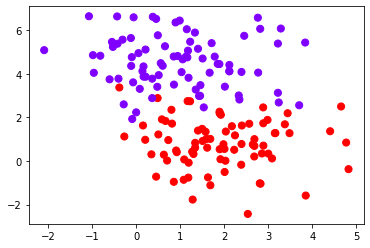

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

X, y = make_blobs(n_samples=160, centers=2,random_state=0, cluster_std=1.2)
plt.scatter(X[:,0], X[:,1], c=y, s=50, cmap='rainbow')

plt.show()

**划分数据集**
+ 训练集+验证集：$120$个样本，占比$75\%$
+ 测试集：$40$个样本，占比$25\%$

In [2]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=131)

print("Shape of X_train:", X_train.shape)
print("Shape of X_test:",X_test.shape)

Shape of X_train: (120, 2)
Shape of X_test: (40, 2)


**10折交叉验证选择最优超参数**
+ 使用函数GridSearchCV，在16组超参数中选择最优
+ 调和参数$C$，在$\{0.1,1,10,100\}$中选择
+ 高斯核函数参数$\gamma$，在$\{0.1,1,10,20\}$中选择
+ 显示函数10折交叉验证选择出的一组最优超参数
+ 显示所有16组超参数的交叉验证平均正确率、正确率的标准差、最优次序排名

In [3]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

svc = SVC(kernel='rbf')
param_grid = {'C': [0.1, 1, 10, 100],'gamma': [0.1, 1, 10, 20]}
grid = GridSearchCV(svc, param_grid,cv=10).fit(X_train, y_train)
print("Selected Best Params:", grid.best_params_)

print('\nParams\t \t\t Mean Test Score\t STD Test Score\t \tRank')
for i in range(16):
    print('C=',grid.cv_results_['params'][i]['C'], chr(947),'=',grid.cv_results_['params'][i]['gamma'],'\t\t',\
            "%5.4f \t\t %5.4f \t\t %d" % (grid.cv_results_['mean_test_score'][i], \
            grid.cv_results_['std_test_score'][i], grid.cv_results_['rank_test_score'][i]) )

Selected Best Params: {'C': 1, 'gamma': 1}

Params	 		 Mean Test Score	 STD Test Score	 	Rank
C= 0.1 γ = 0.1 		 0.9250 		 0.0583 		 4
C= 0.1 γ = 1 		 0.8833 		 0.0850 		 8
C= 0.1 γ = 10 		 0.5417 		 0.0417 		 15
C= 0.1 γ = 20 		 0.5417 		 0.0417 		 15
C= 1 γ = 0.1 		 0.9333 		 0.0624 		 3
C= 1 γ = 1 		 0.9417 		 0.0534 		 1
C= 1 γ = 10 		 0.8333 		 0.0986 		 9
C= 1 γ = 20 		 0.7667 		 0.0624 		 14
C= 10 γ = 0.1 		 0.9250 		 0.0583 		 4
C= 10 γ = 1 		 0.9167 		 0.0833 		 6
C= 10 γ = 10 		 0.8250 		 0.1017 		 10
C= 10 γ = 20 		 0.7833 		 0.0553 		 12
C= 100 γ = 0.1 		 0.9417 		 0.0534 		 1
C= 100 γ = 1 		 0.9000 		 0.0816 		 7
C= 100 γ = 10 		 0.8250 		 0.1017 		 10
C= 100 γ = 20 		 0.7833 		 0.0553 		 12


**16组超参数设置在测试集上的分类正确率**
+ 分别用每一组超参数学习SVM分类器，训练数据使用(训练集+验证集)
+ 测试所有模型对测试集的分类正确率
+ 画出所有模型的分类边界


Params	 		 Test Score
C= 0.1 γ = 0.1 		 0.9500
C= 0.1 γ = 1 		 0.9500
C= 0.1 γ = 10 		 0.3750
C= 0.1 γ = 20 		 0.3750
C= 1 γ = 0.1 		 0.9500
C= 1 γ = 1 		 1.0000
C= 1 γ = 10 		 0.9250
C= 1 γ = 20 		 0.7750
C= 10 γ = 0.1 		 1.0000
C= 10 γ = 1 		 1.0000
C= 10 γ = 10 		 0.9500
C= 10 γ = 20 		 0.7750
C= 100 γ = 0.1 		 1.0000
C= 100 γ = 1 		 0.9250
C= 100 γ = 10 		 0.9500
C= 100 γ = 20 		 0.7750


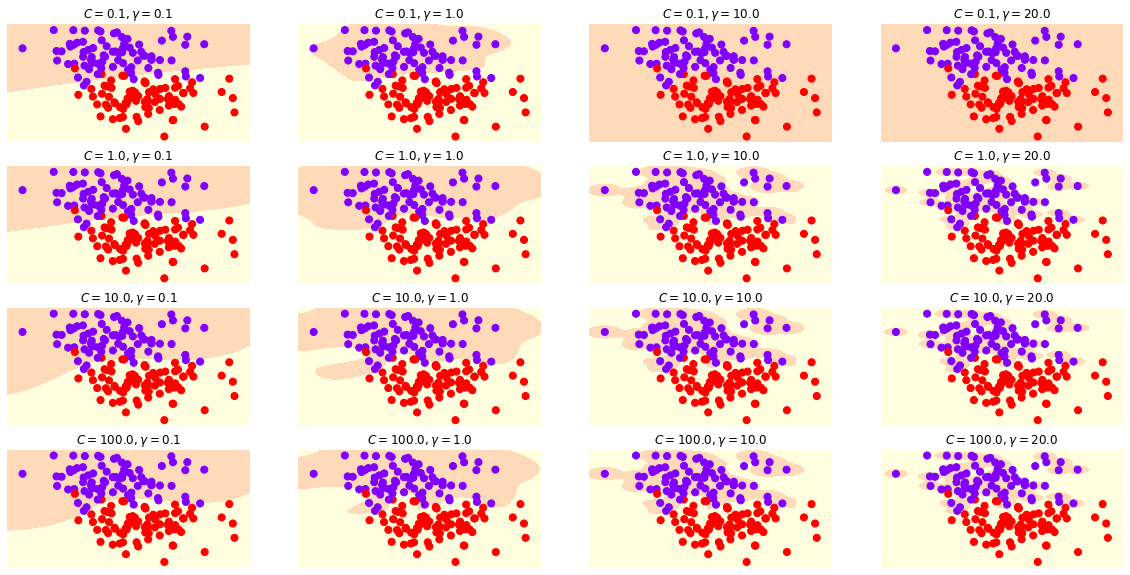

In [4]:
from plot_decision_boundary import plot_decision_boundary

eps = 0.5
x_min,x_max = X[:,0].min()-eps, X[:,0].max()+eps
y_min,y_max = X[:,1].min()-eps, X[:,1].max()+eps

print('\nParams\t \t\t Test Score')
fig, axes = plt.subplots(4,4,figsize=(20, 10))
for i, ax in zip(range(16),axes.reshape([16,1])):
    svc = SVC(kernel='rbf', C=grid.cv_results_['params'][i]['C'], gamma=grid.cv_results_['params'][i]['gamma'])
    svc.fit(X_train,y_train)
    
    plot_decision_boundary(svc,axis=[x_min,x_max,y_min,y_max],ax=ax[0])
    ax[0].scatter(X[:,0], X[:,1], c=y, s=50, cmap='rainbow')
    ax[0].axis("off")
    ax[0].set_title(r'$C=%4.1f,\gamma=%3.1f$' %(grid.cv_results_['params'][i]['C'],grid.cv_results_['params'][i]['gamma']))
    
    print('C=',grid.cv_results_['params'][i]['C'], chr(947),'=',grid.cv_results_['params'][i]['gamma'],'\t\t', "%5.4f" % (svc.score(X_test,y_test)) )

plt.show()